In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
import cv2
import math
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from collections import Counter
from tqdm import tqdm

### The data is stored inside the 'team' directory

In [2]:
path = '../../team/courses/MSiA400/GrandTeton'

In [3]:
path_real = path + '/Photos-20191017T195907Z-001/Photos/'
path_generated_go = path + '/GO_noGO Data Set_Images/TestGo/'
path_generated_nogo = path + '/GO_noGO Data Set_Images/TestNoGo/'

# Set path for training images
filepaths_real = [f for f in listdir(path_real) if f.endswith('.jpg')]
filepaths_go = [f for f in listdir(path_generated_go) if f.endswith('.png')]
filepaths_nogo = [f for f in listdir(path_generated_nogo) if f.endswith('.png')]

In [4]:
# Read all GO and NoGO images into a list
list_img = []
for i in tqdm(filepaths_go):
    list_img.append(cv2.imread(path_generated_go + i))

100%|██████████| 3370/3370 [00:25<00:00, 130.73it/s]


In [5]:
for i in tqdm(filepaths_nogo):
    list_img.append(cv2.imread(path_generated_nogo + i))

100%|██████████| 5001/5001 [00:36<00:00, 138.21it/s]


In [6]:
n = len(list_img)

In [7]:
n

8371

### Contour finding 

In [8]:
img_generated = cv2.imread(path_generated_go+filepaths_go[0])
print(img_generated)

[[[ 32  32  32]
  [ 55  49  43]
  [ 55  49  43]
  ...
  [ 55  49  43]
  [ 55  49  43]
  [ 32  32  32]]

 [[ 32  32  32]
  [ 98  87  76]
  [112  99  87]
  ...
  [111  98  86]
  [ 97  85  75]
  [ 32  32  32]]

 [[ 32  32  32]
  [100  88  78]
  [114 101  89]
  ...
  [112  99  87]
  [ 98  86  76]
  [ 32  32  32]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [9]:
type(img_generated)

numpy.ndarray

In [10]:
img_generated.shape

(206, 531, 3)

In [11]:
img_generated.dtype

dtype('uint8')

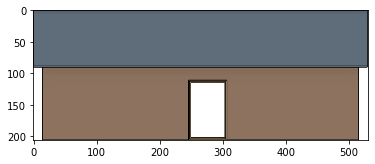

In [12]:
## we can plot the image using matplotlib but the colors are inverted so reverting back using cv2.COLOR_BGR2RGB function.
plt.imshow(cv2.cvtColor(img_generated, cv2.COLOR_BGR2RGB))
plt.show()

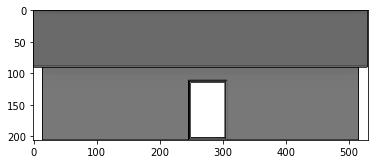

In [13]:
gray_generated = cv2.cvtColor(img_generated, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_generated, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
gray_generated

array([[ 32,  48,  48, ...,  48,  48,  32],
       [ 32,  85,  97, ...,  96,  83,  32],
       [ 32,  86,  99, ...,  97,  84,  32],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [15]:
ret, thresh_generated = cv2.threshold(gray_generated, 200, 255, 0)

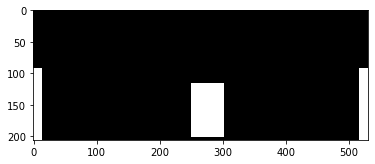

In [16]:
plt.imshow(cv2.cvtColor(thresh_generated, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
contours, h = cv2.findContours(thresh_generated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [18]:
polygons = [cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True) for contour in contours]

In [19]:
polygons_4 = [polygon for polygon in polygons if len(polygon) == 4]

In [20]:
polygons_4

[array([[[251, 116]],
 
        [[251, 200]],
 
        [[302, 200]],
 
        [[302, 116]]], dtype=int32), array([[[516,  92]],
 
        [[516, 205]],
 
        [[530, 205]],
 
        [[530,  92]]], dtype=int32), array([[[  0,  92]],
 
        [[  0, 205]],
 
        [[ 14, 205]],
 
        [[ 14,  92]]], dtype=int32)]

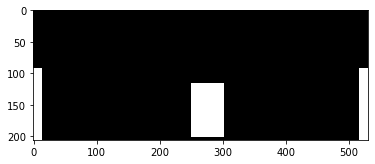

In [21]:
temp = cv2.cvtColor(thresh_generated, cv2.COLOR_GRAY2BGR)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

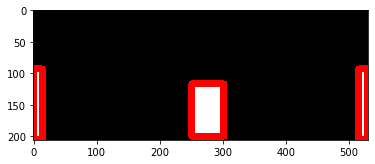

In [22]:
contour_img = cv2.drawContours(temp, polygons_4, -1, (0,0,255), 10)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

### Real Image

In [23]:
img_real = cv2.imread(path_real+filepaths_real[0])
print(img_real)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 11  39  26]
  [ 17  43  30]
  [ 20  44  32]
  ...
  [ 55  71  60]
  [ 51  67  56]
  [ 51  67  56]]

 [[ 10  40  27]
  [ 17  45  32]
  [ 19  43  31]
  ...
  [ 57  73  62]
  [ 55  69  58]
  [ 54  68  57]]

 [[ 10  40  27]
  [ 14  42  29]
  [ 18  42  30]
  ...
  [ 57  73  62]
  [ 55  69  58]
  [ 52  66  55]]]


In [24]:
type(img_real)

numpy.ndarray

In [25]:
img_real.shape

(3120, 4160, 3)

In [26]:
img_real.dtype

dtype('uint8')

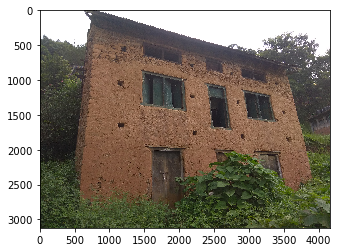

In [27]:
## we can plot the image using matplotlib but the colors are inverted so reverting back using cv2.COLOR_BGR2RGB function.
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

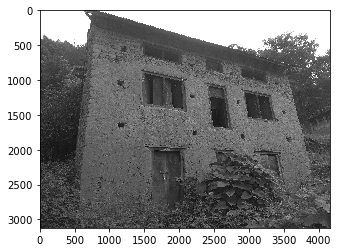

In [28]:
gray_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_real, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
gray_real

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 32,  36,  38, ...,  66,  62,  62],
       [ 33,  38,  37, ...,  68,  64,  63],
       [ 33,  35,  36, ...,  68,  64,  61]], dtype=uint8)

In [30]:
thresh_real = cv2.adaptiveThreshold(gray_real, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 401, 0)

In [31]:
thresh_real

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

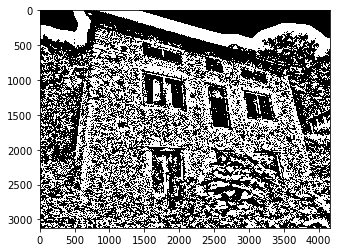

In [32]:
plt.imshow(cv2.cvtColor(thresh_real, cv2.COLOR_BGR2RGB))
plt.show()

### Bilateral filtering for smoothing and reducing noise

In [33]:
img_filtered = cv2.bilateralFilter(gray_real, 100, 500, 10)

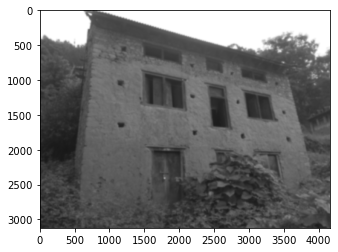

In [34]:
plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
ret, thresh_real = cv2.threshold(img_filtered, 75, 255, 0)
thresh_real = cv2.adaptiveThreshold(img_filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 801, 10)
# ret, thresh_real = cv2.threshold(img_filtered,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

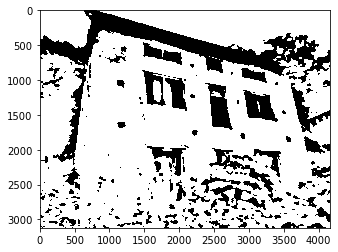

In [36]:
plt.imshow(cv2.cvtColor(thresh_real, cv2.COLOR_BGR2RGB))
plt.show()

## filtering bad contours

In [37]:
contours, h = cv2.findContours(thresh_real, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
approx_polygons = [cv2.approxPolyDP(contour,0.001*cv2.arcLength(contour,True),True) for contour in contours]

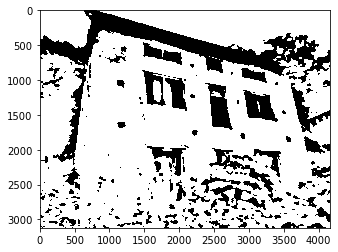

In [38]:
temp = cv2.cvtColor(thresh_real, cv2.COLOR_GRAY2BGR)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

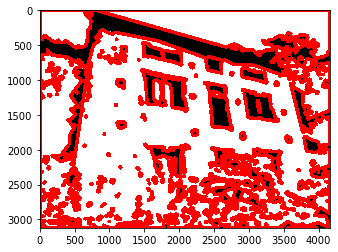

In [39]:
contour_img = cv2.drawContours(temp, approx_polygons, -1, (0,0,255), 50)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

In [40]:
area = thresh_real.shape[0]*thresh_real.shape[1]
polygons = [polygon for polygon in approx_polygons if cv2.contourArea(polygon) > 0.001*area]

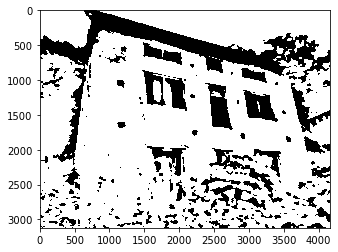

In [41]:
temp = cv2.cvtColor(thresh_real, cv2.COLOR_GRAY2BGR)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

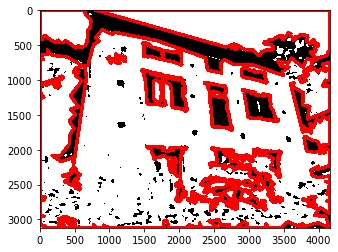

In [42]:
contour_img = cv2.drawContours(temp, polygons, -1, (0,0,255), 50)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

In [43]:
convex_polygons = [cv2.convexHull(polygon) for polygon in polygons if len(polygon)]

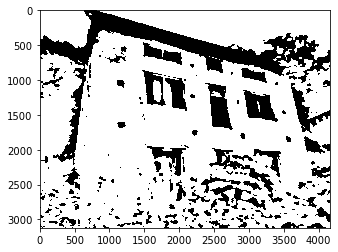

In [44]:
temp = cv2.cvtColor(thresh_real, cv2.COLOR_GRAY2BGR)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

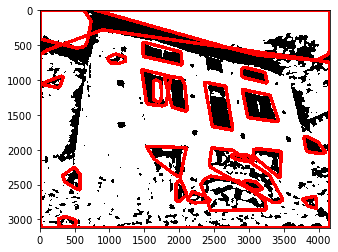

In [45]:
contour_img = cv2.drawContours(temp, convex_polygons, -1, (0,0,255), 50)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

In [46]:
final_polygons = [cv2.convexHull(polygon) for polygon in convex_polygons if len(polygon) >= 3 and cv2.contourArea(polygon) > 0.001*area and cv2.contourArea(polygon) < 0.25*area]

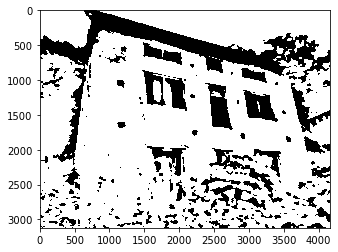

In [47]:
temp = cv2.cvtColor(thresh_real, cv2.COLOR_GRAY2BGR)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

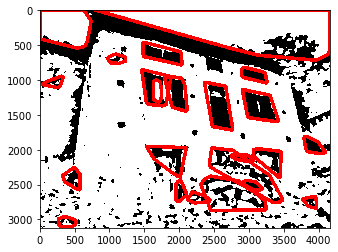

In [48]:
contour_img = cv2.drawContours(temp, final_polygons, -1, (0,0,255), 50)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

In [49]:
len(final_polygons)

23

In [50]:
polygons_dist = [len(polygon) for polygon in polygons]
Counter(polygons_dist)

Counter({167: 1,
         101: 1,
         78: 1,
         86: 1,
         76: 1,
         99: 1,
         132: 1,
         133: 2,
         108: 1,
         82: 1,
         94: 1,
         77: 1,
         73: 1,
         79: 1,
         75: 1,
         100: 1,
         63: 1,
         105: 1,
         93: 1,
         87: 1,
         97: 1,
         66: 1,
         56: 1})

In [51]:
polygons_areas = [cv2.contourArea(polygon) for polygon in polygons]
Counter(polygons_areas)

Counter({9826210.5: 1,
         17319.5: 1,
         13986.0: 1,
         16209.0: 1,
         16590.5: 1,
         21825.5: 1,
         130018.5: 1,
         32671.5: 1,
         13612.0: 1,
         50012.0: 1,
         127555.0: 1,
         88002.0: 1,
         39305.0: 1,
         136817.0: 1,
         143780.5: 1,
         86838.5: 1,
         15412.5: 1,
         114861.5: 1,
         30582.5: 1,
         44359.5: 1,
         13357.5: 1,
         80239.5: 1,
         1248497.5: 1,
         318638.0: 1})

### testing

In [52]:
def openings_real (img):
    gray_real = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_filtered = cv2.bilateralFilter(gray_real, 100, 500, 10)
    # ret, thresh_real = cv2.threshold(img_filtered, 75, 255, 0)
    thresh_real = cv2.adaptiveThreshold(img_filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 801, 10)
    contours, h = cv2.findContours(thresh_real, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    approx_polygons = [cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True) for contour in contours]
    temp = cv2.cvtColor(thresh_real, cv2.COLOR_GRAY2BGR)
    area = thresh_real.shape[0]*thresh_real.shape[1]
    polygons = [polygon for polygon in approx_polygons if cv2.contourArea(polygon) > 0.001*area]
    convex_polygons = [cv2.convexHull(polygon) for polygon in polygons if len(polygon)]
    final_polygons = [cv2.convexHull(polygon) for polygon in convex_polygons if len(polygon) >= 3 and len(polygon) <= 6 
                      and cv2.contourArea(polygon) > 0.001*area and cv2.contourArea(polygon) < 0.15*area]    
    
    ## remove polygons which are too close to the borders
    redflag = [0]*len(final_polygons)
    for i in range(len(final_polygons)):
        q = final_polygons[i]
        for point in q:
            if abs(point[0][0] - gray_real.shape[1]) < 50 or abs(point[0][0]) < 50:
                redflag[i] = 1
            if abs(point[0][1] - gray_real.shape[0]) < 50 or abs(point[0][1]) < 50:
                redflag[i] = 1
    openings = [final_polygons[i] for i in range(len(final_polygons)) if redflag[i] != 1]
    contour_img = cv2.drawContours(temp, openings, -1, (0,0,255), 50)    

    return contour_img, list(openings)

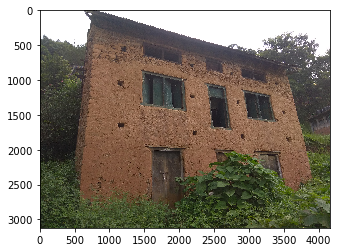

In [53]:
img_real = cv2.imread(path_real+filepaths_real[0])
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

Counter({6: 4, 4: 4})


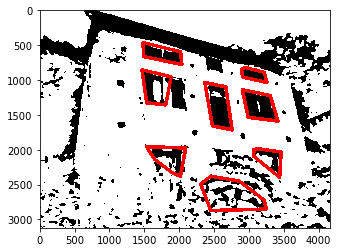

In [54]:
contour_img = openings_real(img_real)[0]
polygons = openings_real(img_real)[1]
print(Counter([len(polygon) for polygon in polygons]))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

In [55]:
polygons

[array([[[3245, 2849]],
 
        [[2448, 2869]],
 
        [[2306, 2493]],
 
        [[2448, 2378]],
 
        [[2857, 2447]],
 
        [[3218, 2723]]], dtype=int32), array([[[3458, 2032]],
 
        [[3437, 2394]],
 
        [[3388, 2355]],
 
        [[3063, 2091]],
 
        [[3068, 1997]],
 
        [[3127, 1984]]], dtype=int32), array([[[2090, 1974]],
 
        [[2014, 2379]],
 
        [[1925, 2340]],
 
        [[1881, 2318]],
 
        [[1646, 2138]],
 
        [[1527, 1956]]], dtype=int32), array([[[3414, 1589]],
 
        [[2986, 1536]],
 
        [[2901, 1141]],
 
        [[3301, 1223]]], dtype=int32), array([[[2756, 1714]],
 
        [[2472, 1659]],
 
        [[2365, 1038]],
 
        [[2664, 1098]]], dtype=int32), array([[[1880,  957]],
 
        [[1804, 1358]],
 
        [[1530, 1328]],
 
        [[1462,  855]]], dtype=int32), array([[[3255, 1036]],
 
        [[2908,  961]],
 
        [[2888,  850]],
 
        [[2943,  822]],
 
        [[2960,  826]],
 
        [[3217,  8

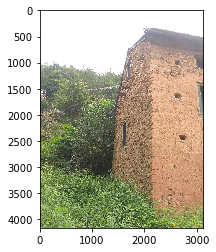

In [56]:
img_real = cv2.imread(path_real+filepaths_real[1])
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

Counter({6: 1, 5: 1})


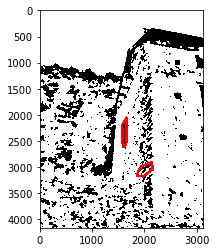

In [57]:
contour_img = openings_real(img_real)[0]
polygons = openings_real(img_real)[1]
print(Counter([len(polygon) for polygon in polygons]))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

In [58]:
polygons

[array([[[2140, 3046]],
 
        [[1968, 3172]],
 
        [[1848, 3167]],
 
        [[1878, 3051]],
 
        [[1935, 2976]],
 
        [[2130, 2907]]], dtype=int32), array([[[1649, 2053]],
 
        [[1641, 2536]],
 
        [[1621, 2586]],
 
        [[1578, 2613]],
 
        [[1560, 2199]]], dtype=int32)]

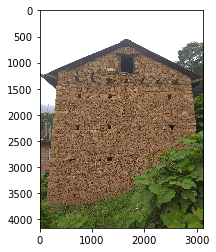

In [59]:
img_real = cv2.imread(path_real+filepaths_real[2])
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

Counter()


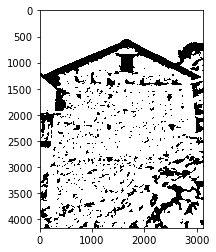

In [60]:
contour_img = openings_real(img_real)[0]
polygons = openings_real(img_real)[1]
print(Counter([len(polygon) for polygon in polygons]))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

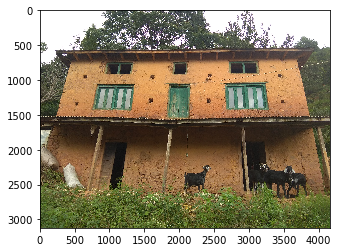

In [61]:
img_real = cv2.imread(path_real+filepaths_real[3])
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

Counter({5: 2, 4: 2, 6: 1})


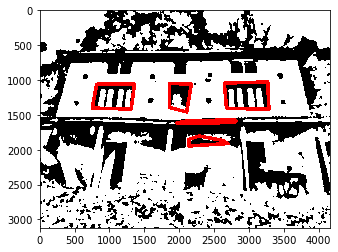

In [62]:
contour_img = openings_real(img_real)[0]
polygons = openings_real(img_real)[1]
print(Counter([len(polygon) for polygon in polygons]))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

### level detection

In [205]:
def lines(img):
    # Function that counts the number of floors
    # Convert img to grayscale
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Get shape
    shape = gray.shape

    # Get width of the image
    width = shape[1]

    # Detect edges
    edges = cv2.Canny(gray, 80, 120)

    #HoughLinesP returns an array of (rho, theta) values. 
    #rho is measured in pixels and theta is measured in radians

    # Detect lines representing the floors which are longer than 80% of the width of the building
    lines = cv2.HoughLinesP(edges, rho = 1, theta = math.pi/2, minLineLength = 0.8*width, threshold = 1, maxLineGap = 3)

    flags = [0]
    if (type(lines) != type(None)):
        lines.tolist()

        # Delete repeated lines and line detected from the roof (we only need floor lines to count the number of floors)

        flags = [0]*len(lines)  # flags will mark the redundant lines as 1, lines we need as 0
        for i in range(len(lines)):
            for j in range(len(lines)):
                if j < i and (abs(lines[i][0][1]-lines[j][0][1]) < 15):  # detect lines very close to each other 
                    flags[j] = 1
            if abs(lines[i][0][1]-0) < 10:  # roof lines: y Coordinate -> 0
                flags[i] = 1
    counter = 0
    for i in range(len(flags)):
        if flags[i] == 0:
            counter += 1  
    lines_final = []        
    for i in range(len(lines)):
        if (flags[i] == 0):
            lines_final.append(lines[i])
    return lines_final, counter

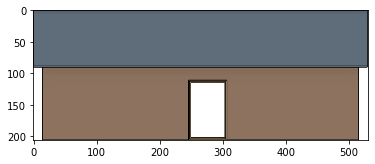

In [206]:
img_real = cv2.imread(path_real+filepaths_real[1])
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

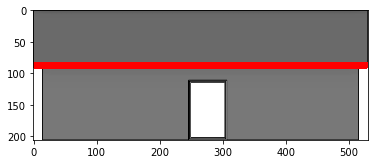

In [207]:
lines_generated = lines(img_real)[0]
count = lines(img_generated)[1]
gray_generated=cv2.cvtColor(img_generated,cv2.COLOR_BGR2GRAY)
temp = cv2.cvtColor(gray_generated, cv2.COLOR_GRAY2BGR)
for i in range(count):
    line = lines_generated[i]
    x1,y1,x2,y2 = line[0]
    cv2.line(temp, (x1,y1), (x2,y2), (0,0,255), 10)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

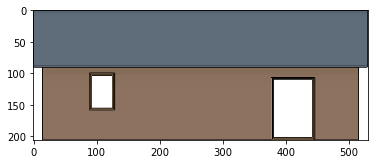

In [208]:
img_generated = cv2.imread(path_generated_go+filepaths_go[2])
plt.imshow(cv2.cvtColor(img_generated, cv2.COLOR_BGR2RGB))
plt.show()

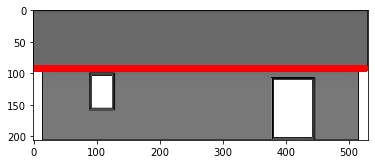

In [209]:
lines_generated = lines(img_generated)[0]
count = lines(img_generated)[1]
gray_generated=cv2.cvtColor(img_generated,cv2.COLOR_BGR2GRAY)
temp = cv2.cvtColor(gray_generated, cv2.COLOR_GRAY2BGR)
for i in range(count):
    line = lines_generated[i]
    x1,y1,x2,y2 = line[0]
    cv2.line(temp, (x1,y1), (x2,y2), (0,0,255), 10)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

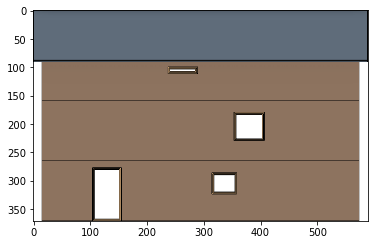

In [210]:
img_generated = cv2.imread(path_generated_go+filepaths_go[3])
plt.imshow(cv2.cvtColor(img_generated, cv2.COLOR_BGR2RGB))
plt.show()

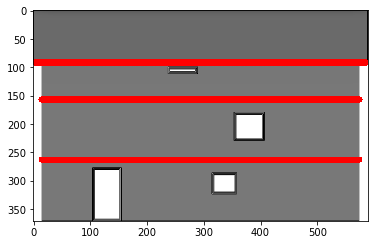

In [211]:
lines_generated = lines(img_generated)[0]
count = lines(img_generated)[1]
gray_generated=cv2.cvtColor(img_generated,cv2.COLOR_BGR2GRAY)
temp = cv2.cvtColor(gray_generated, cv2.COLOR_GRAY2BGR)
for i in range(count):
    line = lines_generated[i]
    x1,y1,x2,y2 = line[0]
    cv2.line(temp, (x1,y1), (x2,y2), (0,0,255), 10)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

### Real Image

In [414]:
def lines_real(img):
    # Function that counts the number of floors
    # Convert img to grayscale

    gray_real = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # bilateral filtering

    # Get shape
    shape = gray_real.shape

    # Get width of the image
    width = shape[1]
    size = max(shape[0],shape[1])

#     ## using code from coutour detection
#     img_filtered = cv2.bilateralFilter(gray_real, 100, 500, 10)
#     # ret, thresh_real = cv2.threshold(img_filtered, 75, 255, 0)
#     thresh_real = cv2.adaptiveThreshold(img_filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 801, 10)
#     contours, h = cv2.findContours(thresh_real, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     approx_polygons = [cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True) for contour in contours]
#     area = thresh_real.shape[0]*thresh_real.shape[1]
#     polygons = [polygon for polygon in approx_polygons if cv2.contourArea(polygon) > 0.001*area]
#     convex_polygons = [cv2.convexHull(polygon) for polygon in polygons if len(polygon)]
        
#     temp = np.ones(img.shape, dtype = 'uint8')
#     contour_img = cv2.drawContours(temp, convex_polygons, -1, (0,0,255), 50)    
#     ## using code from coutour detection
#     return contour_img
    # Detect edges
#     edges = cv2.Canny(contour_img, 80, 120)
    
    #HoughLinesP returns an array of (rho, theta) values. 
    #rho is measured in pixels and theta is measured in radians

    img_filtered = cv2.bilateralFilter(gray_real, 100, 500, 10)
    edges = cv2.Canny(img_filtered, 8, 12)

    # Detect lines representing the floors which are longer than 2% of the width of the building
    lines = cv2.HoughLinesP(edges, rho = 1, theta = math.pi/180, threshold = 1, minLineLength = 0.001*width, maxLineGap = 0.5*width)
    
    
    flags = [0]
    if (type(lines) != type(None)):
        lines.tolist()

        # Delete repeated lines and lines which are very vertical

        flags = [0]*len(lines)  # flags will mark the redundant lines as 1, lines we need as 0
        for i in range(len(lines)):
            for j in range(len(lines)):
                if j < i and (abs(lines[i][0][1]-lines[j][0][1]) <  0.001*size):  # detect lines very close to each other 
                    flags[j] = 1
            if (abs(lines[i][0][0]-lines[i][0][2])) == 0: # vertical lines
                flags[i] = 1 
            elif (abs(lines[i][0][1]-lines[i][0][3])/abs(lines[i][0][0]-lines[i][0][2]) > 1):  # lines with absolute slope>1
                flags[i] = 1
    counter = 0
    for i in range(len(flags)):
        if flags[i] == 0:
            counter += 1  
    lines_final = []        
    for i in range(len(lines)):
        if (flags[i] == 0):
            lines_final.append(lines[i])
    return lines_final, counter

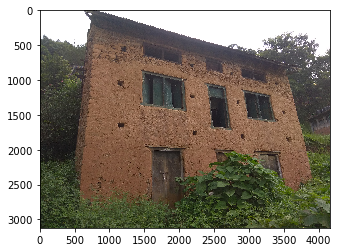

In [401]:
img_real = cv2.imread(path_real+filepaths_real[0])
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

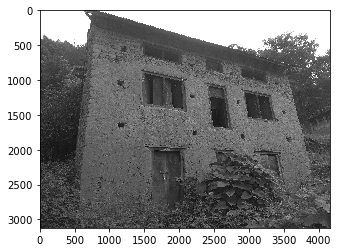

In [402]:
gray_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_real, cv2.COLOR_BGR2RGB))
plt.show()

### Bilateral filtering for smoothing and reducing noise

In [403]:
img_filtered = cv2.bilateralFilter(gray_real, 100, 500, 10)

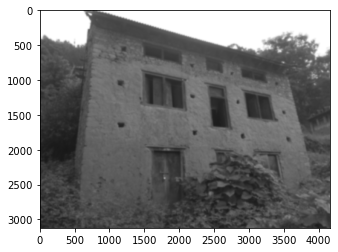

In [404]:
plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB))
plt.show()

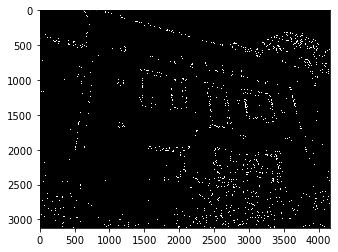

In [405]:
edges_real = cv2.Canny(img_filtered, 8, 12)
plt.imshow(cv2.cvtColor(edges_real, cv2.COLOR_BGR2RGB))
plt.show()
# bilateral

### test

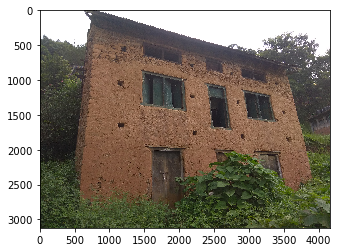

In [415]:
img_real = cv2.imread(path_real+filepaths_real[0])
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

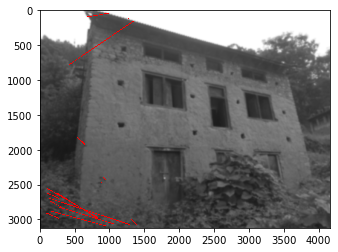

In [416]:
lines, counter = lines_real(img_real)
temp = cv2.cvtColor(img_filtered, cv2.COLOR_GRAY2BGR)
for i in range(len(lines)):
    line = lines[i]
    x1,y1,x2,y2 = line[0]
    cv2.line(temp, (x1,y1), (x2,y2), (0,0,255), 10)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

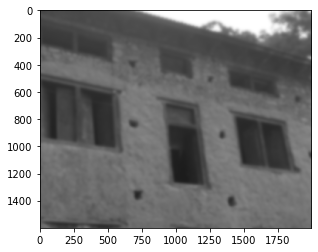

In [417]:
plt.imshow(cv2.cvtColor(temp[400:2000, 1500:3500], cv2.COLOR_BGR2RGB))
plt.show()

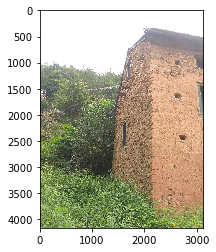

In [418]:
img_real = cv2.imread(path_real+filepaths_real[1])
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

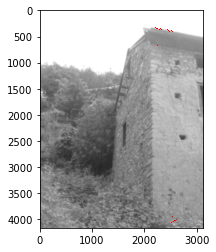

In [419]:
gray_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2GRAY)
img_filtered = cv2.bilateralFilter(gray_real, 100, 500, 10)
lines, counter = lines_real(img_real)
temp = cv2.cvtColor(img_filtered, cv2.COLOR_GRAY2BGR)
for i in range(len(lines)):
    line = lines[i]
    x1,y1,x2,y2 = line[0]
    cv2.line(temp, (x1,y1), (x2,y2), (0,0,255), 10)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

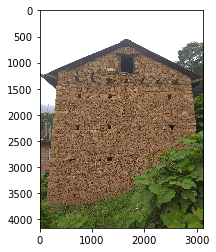

In [421]:
img_real = cv2.imread(path_real+filepaths_real[2])
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

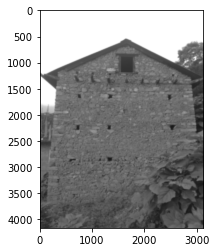

In [422]:
gray_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2GRAY)
img_filtered = cv2.bilateralFilter(gray_real, 100, 500, 10)
lines, counter = lines_real(img_real)
temp = cv2.cvtColor(img_filtered, cv2.COLOR_GRAY2BGR)
for i in range(len(lines)):
    line = lines[i]
    x1,y1,x2,y2 = line[0]
    cv2.line(temp, (x1,y1), (x2,y2), (0,0,255), 10)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()

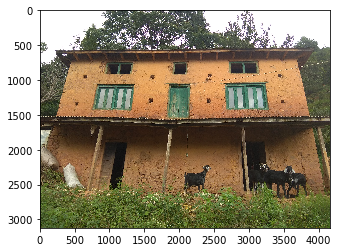

In [423]:
img_real = cv2.imread(path_real+filepaths_real[3])
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

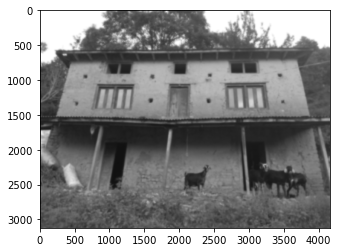

In [424]:
gray_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2GRAY)
img_filtered = cv2.bilateralFilter(gray_real, 100, 500, 10)
lines, counter = lines_real(img_real)
temp = cv2.cvtColor(img_filtered, cv2.COLOR_GRAY2BGR)
for i in range(len(lines)):
    line = lines[i]
    x1,y1,x2,y2 = line[0]
    cv2.line(temp, (x1,y1), (x2,y2), (0,0,255), 10)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.show()